In [0]:
# Change directory to VSCode workspace root so that relative path loads work correctly. Turn this addition off with the DataScience.changeDirOnImportExport setting
# ms-python.python added
import os
try:
	os.chdir(os.path.join(os.getcwd(), '..'))
	print(os.getcwd())
except:
	pass


In [1]:

import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell

# Setting styles
InteractiveShell.ast_node_interactivity = "all"
sns.set(style="whitegrid", color_codes=True, rc={"figure.figsize": (12.7, 9.27)})


 # Loading the data
 * Skipping first row as it contains less informative heading
 * Using provided ID column as index

In [2]:

df = pd.read_csv(
    os.path.join("data", "raw", "defaults.csv"), index_col="ID", skiprows=1
)


 # Basic info

 * Only 30000 rows
 * Many columns need to converted to strings with non numerical values (e.g. education)
 * No obvious missing values

In [3]:

print("Rows in dataset", df.shape)


Rows in dataset (30000, 24)


In [4]:

df.head()


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [5]:

df.dtypes

LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object

In [6]:

df.isnull().sum()


LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [7]:
df.columns = [
    "credit_given",
    "sex",
    "education",
    "marriage",
    "age",
    "pay_status0",
    "pay_status2",
    "pay_status3",
    "pay_status4",
    "pay_status5",
    "pay_status6",
    "bill_amt1",
    "bill_amt2",
    "bill_amt3",
    "bill_amt4",
    "bill_amt5",
    "bill_amt6",
    "pay_amt1",
    "pay_amt2",
    "pay_amt3",
    "pay_amt4",
    "pay_amt5",
    "pay_amt6",
    "defaulted",
]


 # Distributions

 * Education and marriage contain values that are not described in dataset info
 * Codes for payment status seem to have no bearing to what is described in
 dataset info
 * There are lots of values of billable amount that is negative. Does this mean
 that the credit card company was paying the customer or is this an error?
 * The proportion of customers that defaulted is around 20 %. This seems very
 high and raises the question if the dataset is biased

Text(0.5, 1.0, 'credit_given')

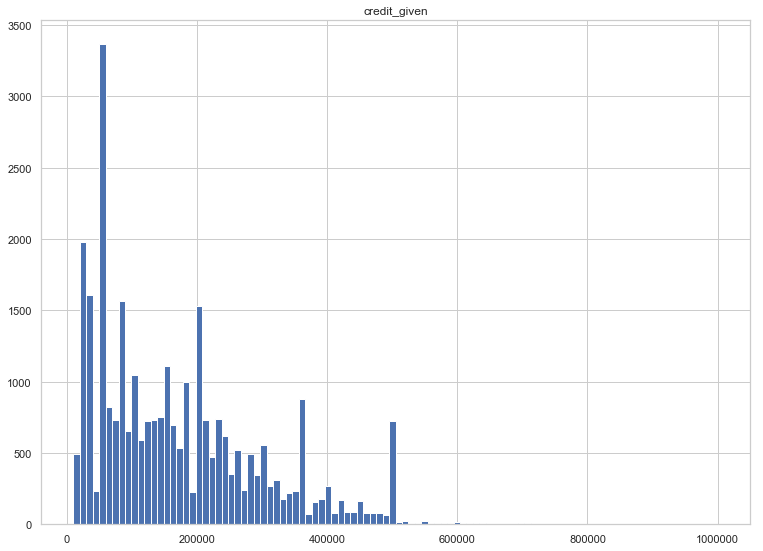

In [8]:

df.credit_given.hist(bins=100)
plt.title("credit_given")
plt.show()


Text(0.5, 1.0, 'sex')

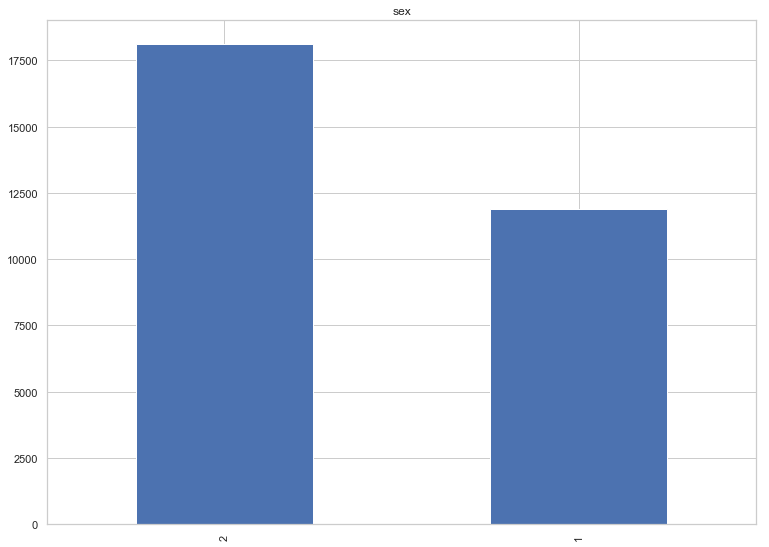

Text(0.5, 1.0, 'sex (recoded)')

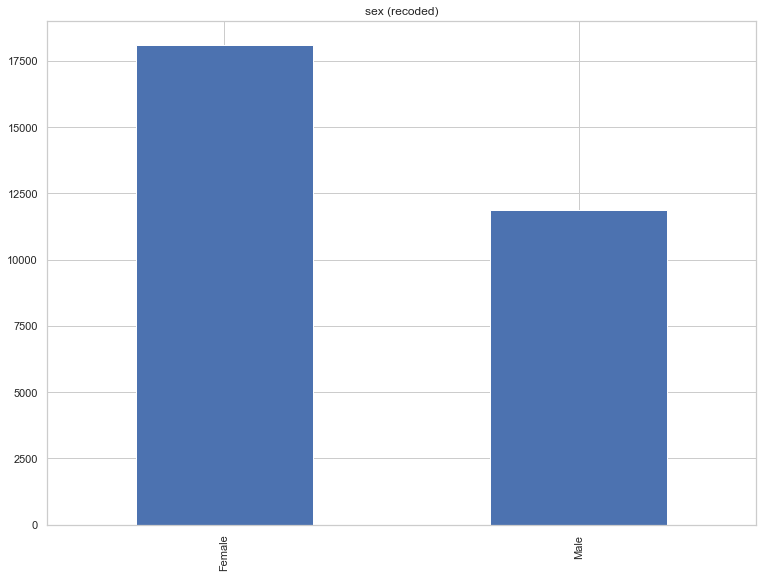

In [9]:

df.sex.value_counts().plot.bar()
plt.title("sex")
plt.show()
df.sex.replace({1: "Male", 2: "Female"}, inplace=True)
df.sex.value_counts().plot.bar()
plt.title("sex (recoded)")
plt.show()


Text(0.5, 1.0, 'education')

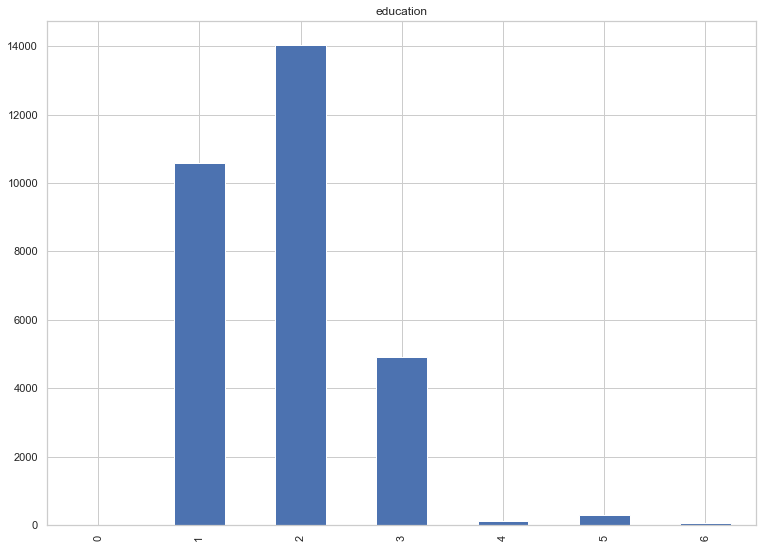

Text(0.5, 1.0, 'education (recoded)')

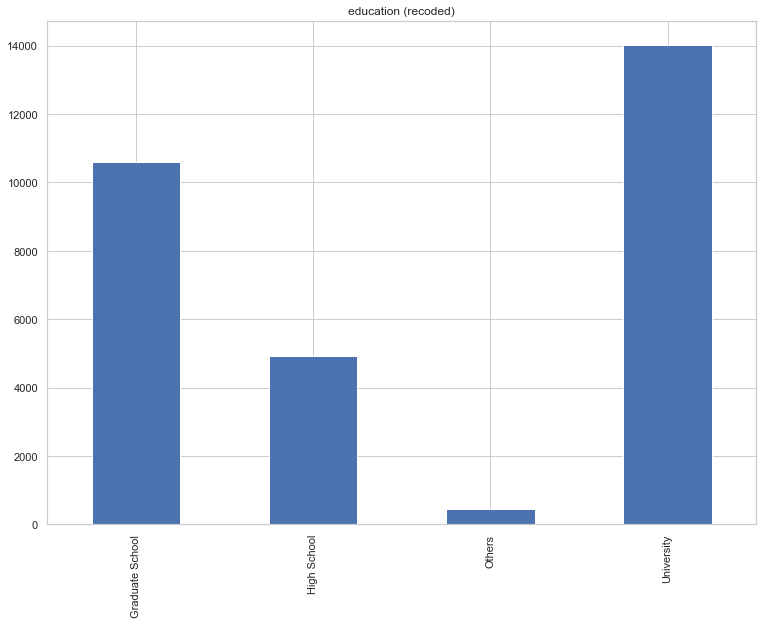

In [10]:

df.education.value_counts().sort_index().plot.bar()
plt.title("education")
plt.show()
# Categories 0, 5 and 6 are not mentioned in dataset info.
# Coding 5 and 6 as Other and guessing that 0 is missing
df.education.replace(
    {
        0: np.nan,
        1: "Graduate School",
        2: "University",
        3: "High School",
        4: "Others",
        5: "Others",
        6: "Others",
    },
    inplace=True,
)
df.education.value_counts().sort_index().plot.bar()
plt.title("education (recoded)")
plt.show()


Text(0.5, 1.0, 'marriage')

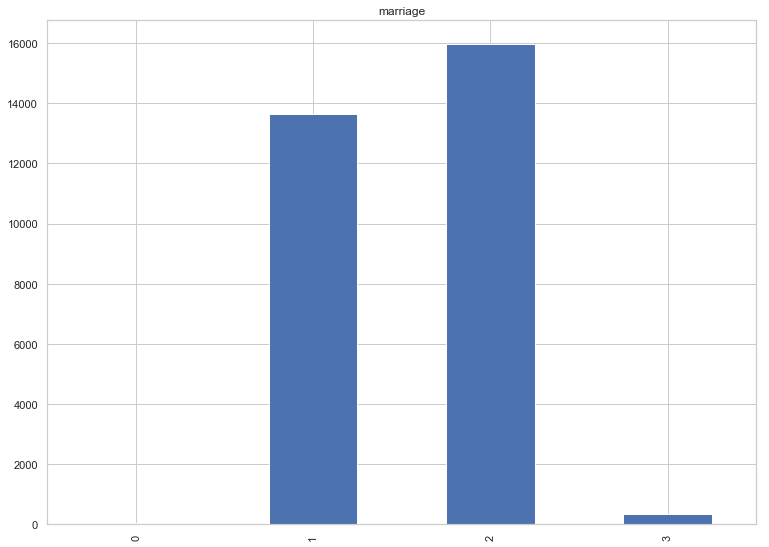

Text(0.5, 1.0, 'marriage (recoded)')

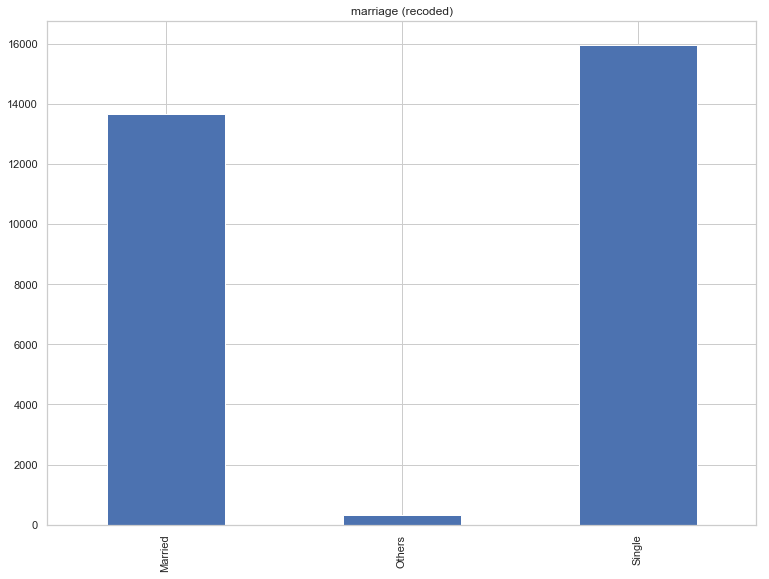

In [11]:

df.marriage.value_counts().sort_index().plot.bar()
plt.title("marriage")
plt.show()
# Zero not in dataset info. Guessing this to be missing
df.marriage.replace({0: np.nan, 1: "Married", 2: "Single", 3: "Others"}, inplace=True)
df.marriage.value_counts().sort_index().plot.bar()
plt.title("marriage (recoded)")
plt.show()



21      67
22     560
23     931
24    1127
25    1186
26    1256
27    1477
28    1409
29    1605
30    1395
31    1217
32    1158
33    1146
34    1162
35    1113
36    1108
37    1041
38     944
39     954
40     870
41     824
42     794
43     670
44     700
45     617
46     570
47     501
48     466
49     452
50     411
51     340
52     304
53     325
54     247
55     209
56     178
57     122
58     122
59      83
60      67
61      56
62      44
63      31
64      31
65      24
66      25
67      16
68       5
69      15
70      10
71       3
72       3
73       4
74       1
75       3
79       1
Name: age, dtype: int64

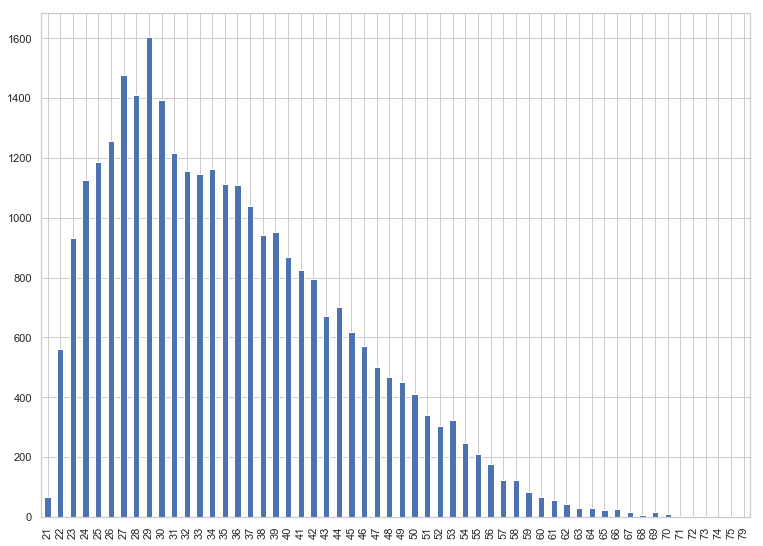

In [12]:

# no weird values
df.age.value_counts().sort_index().plot.bar()
df.age.value_counts().sort_index()


Text(0.5, 1.0, 'pay_status0')

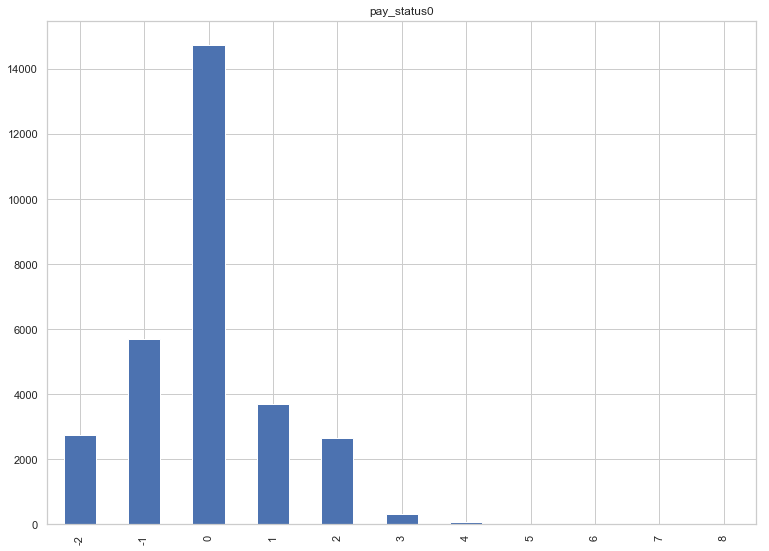

Text(0.5, 1.0, 'pay_status2')

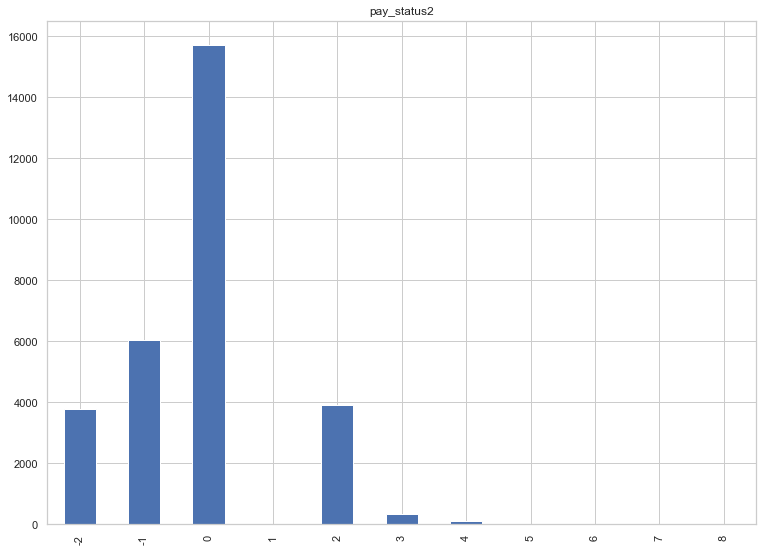

Text(0.5, 1.0, 'pay_status3')

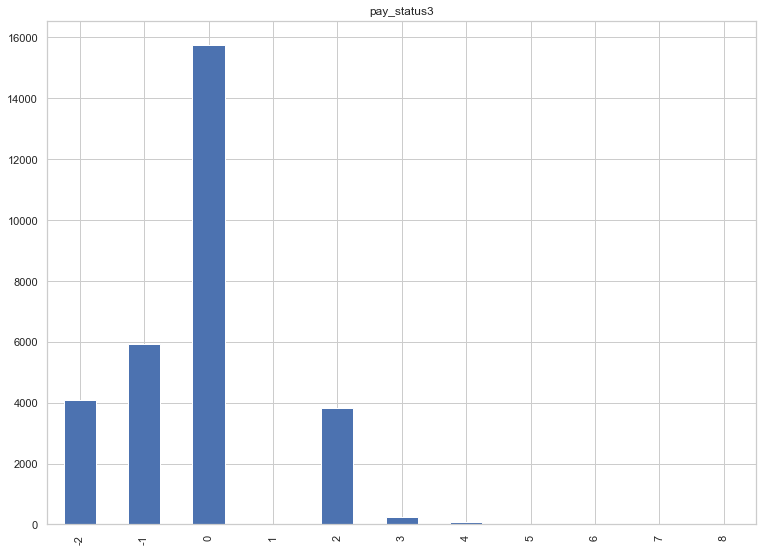

Text(0.5, 1.0, 'pay_status4')

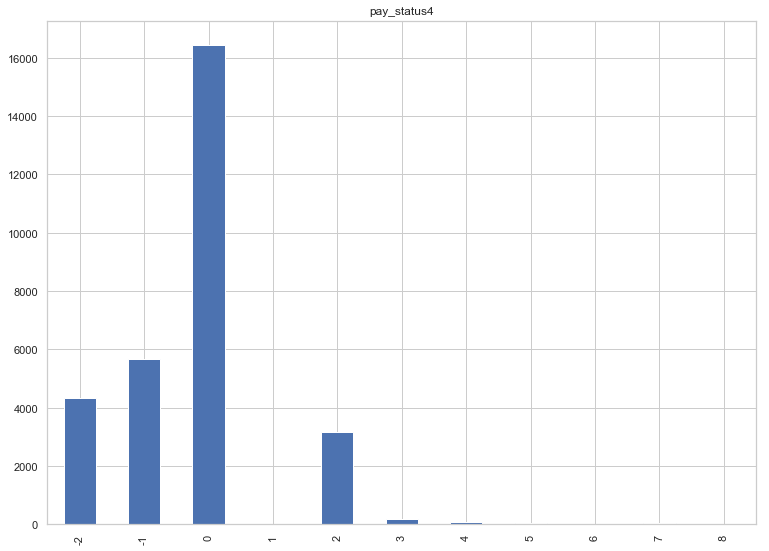

Text(0.5, 1.0, 'pay_status5')

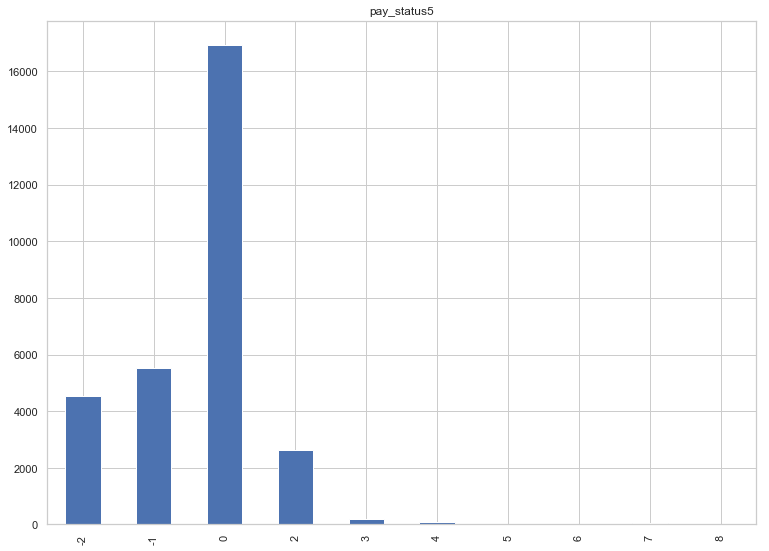

Text(0.5, 1.0, 'pay_status6')

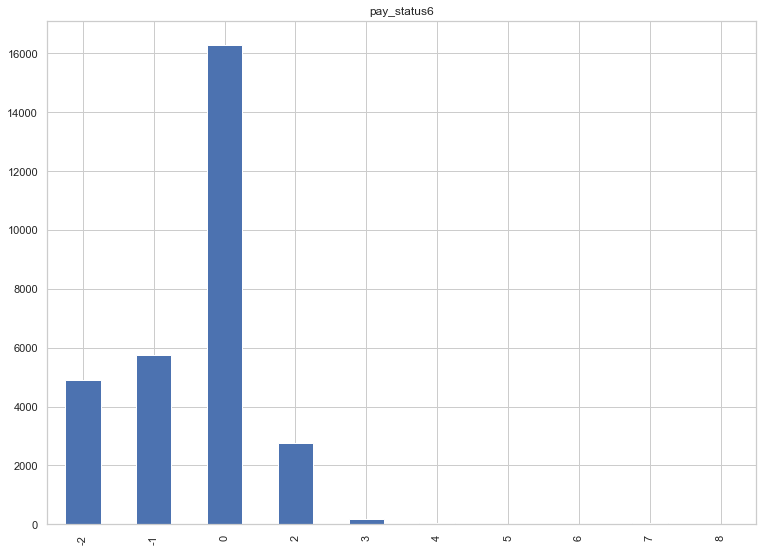

In [13]:

# The values of these columns does not match the dataset description
# Leaving as is until more info found.
# Also weird that there is no pay_status1
pay_status_cols = [
    "pay_status0",
    "pay_status2",
    "pay_status3",
    "pay_status4",
    "pay_status5",
    "pay_status6",
]
for col in pay_status_cols:
    df[col].value_counts().sort_index().plot.bar()
    plt.title(col)
    plt.show()


Text(0.5, 1.0, 'bill_amt1')

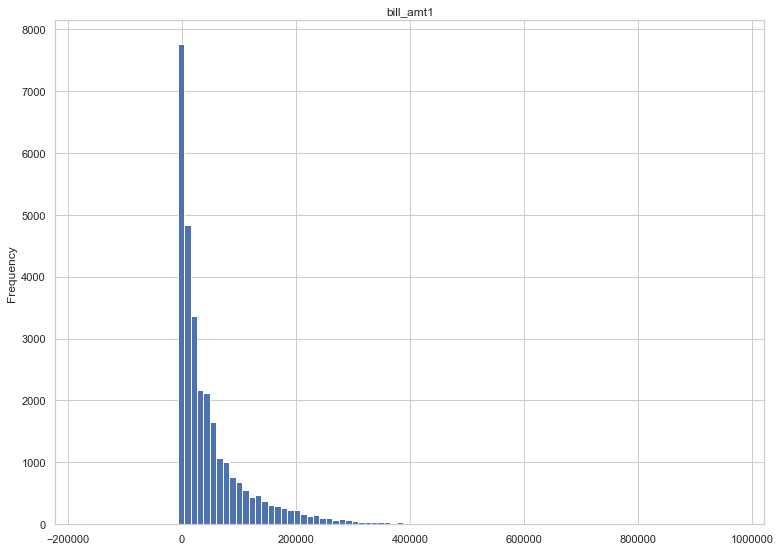

Text(0.5, 1.0, 'bill_amt2')

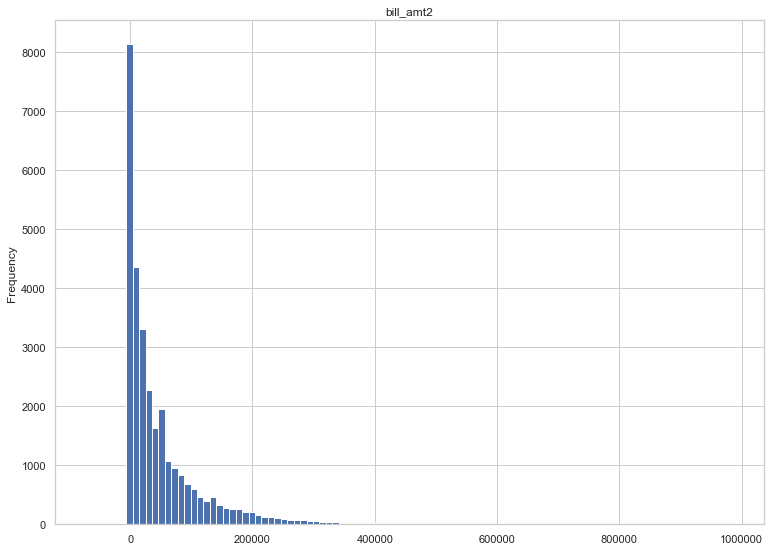

Text(0.5, 1.0, 'bill_amt3')

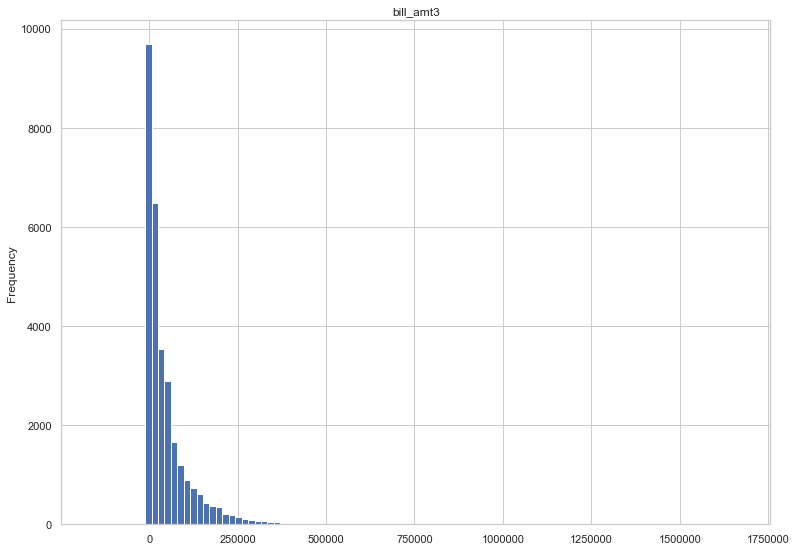

Text(0.5, 1.0, 'bill_amt4')

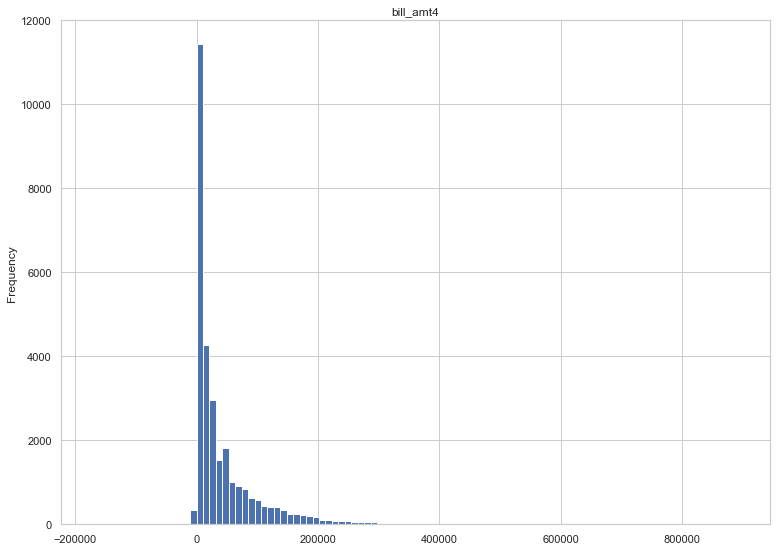

Text(0.5, 1.0, 'bill_amt5')

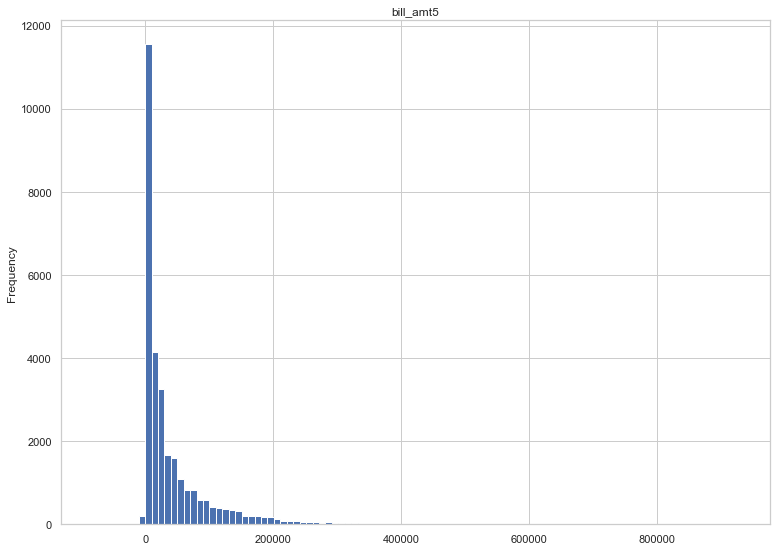

Text(0.5, 1.0, 'bill_amt6')

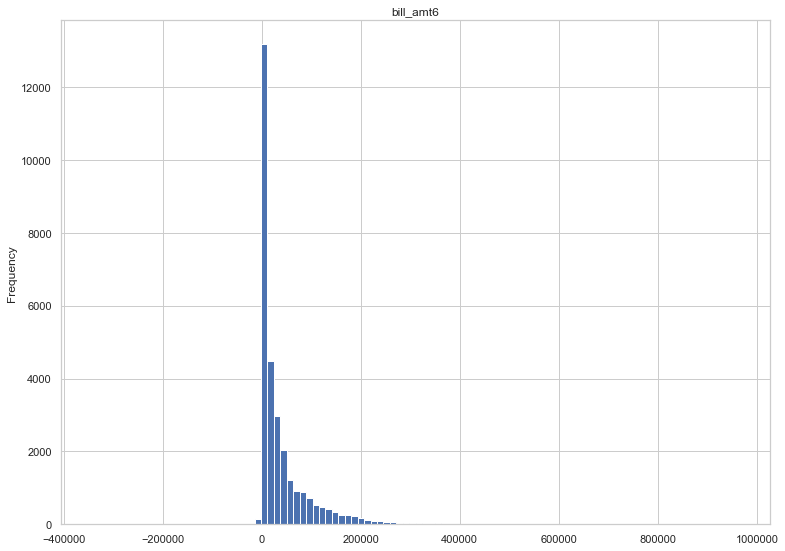

In [14]:

bill_cols = [
    "bill_amt1",
    "bill_amt2",
    "bill_amt3",
    "bill_amt4",
    "bill_amt5",
    "bill_amt6",
]

# How are negative numbers possible
for col in bill_cols:
    df[col].plot.hist(bins=100)
    plt.title(col)
    plt.show()


Text(0.5, 1.0, 'pay_amt1')

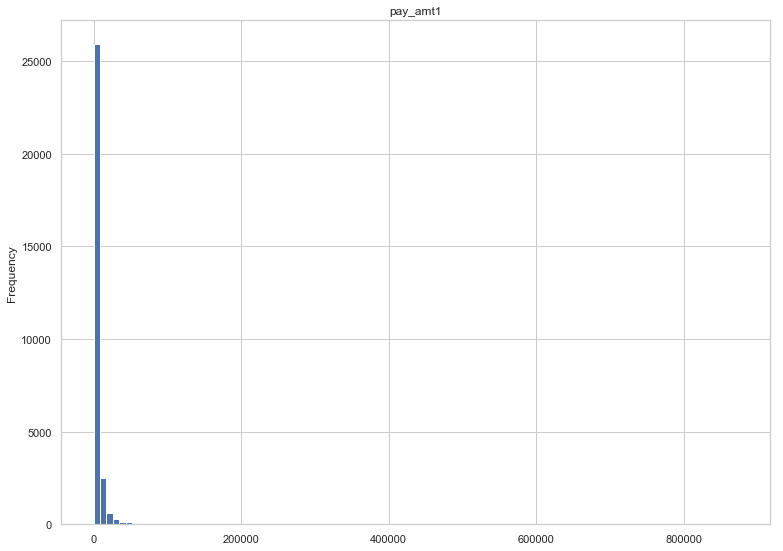

Text(0.5, 1.0, 'pay_amt2')

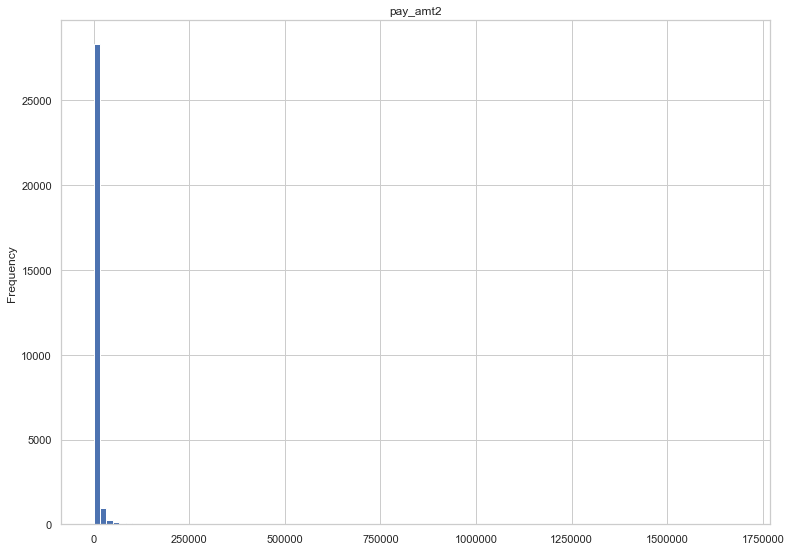

Text(0.5, 1.0, 'pay_amt3')

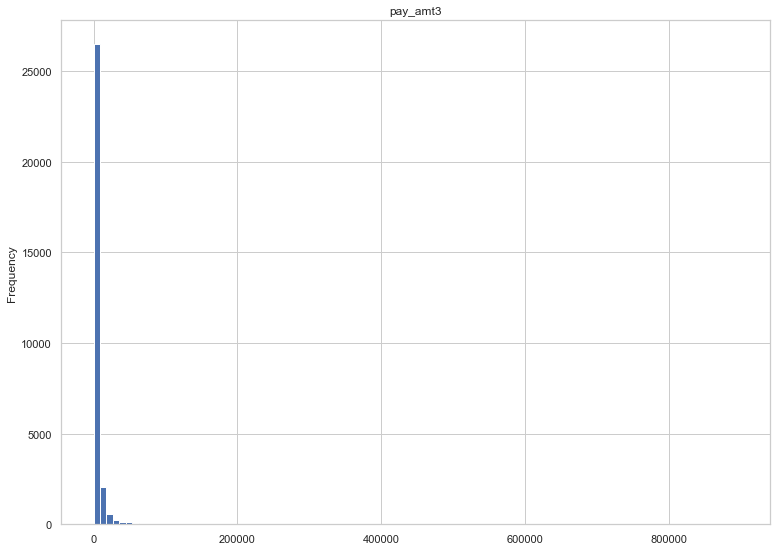

Text(0.5, 1.0, 'pay_amt4')

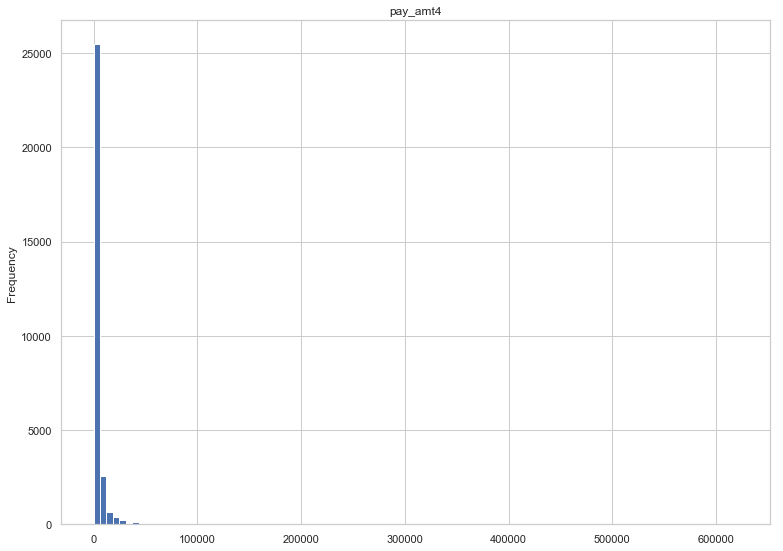

Text(0.5, 1.0, 'pay_amt5')

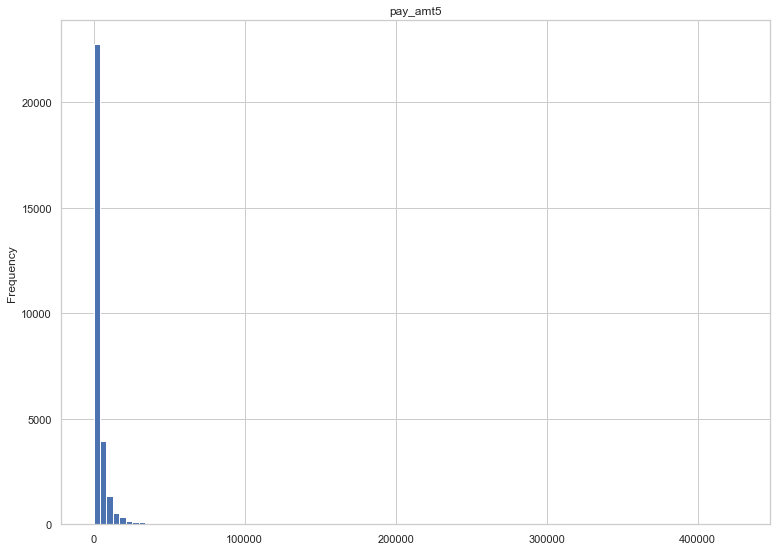

Text(0.5, 1.0, 'pay_amt6')

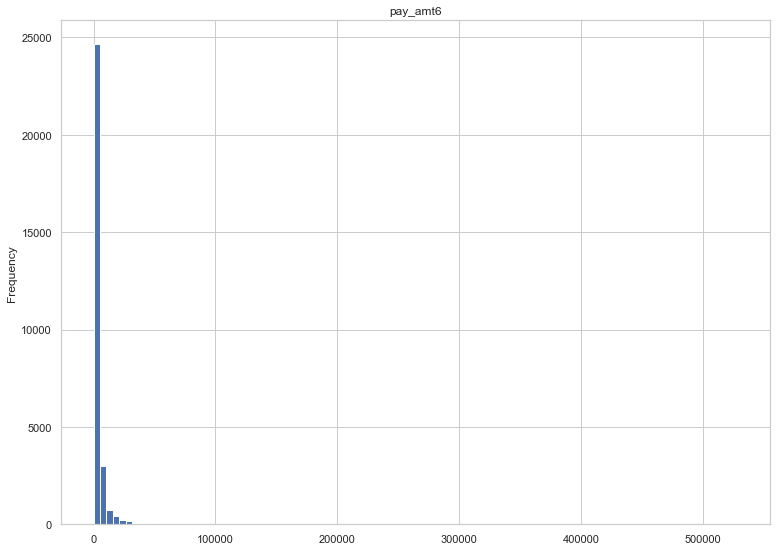

In [15]:

pay_cols = ["pay_amt1", "pay_amt2", "pay_amt3", "pay_amt4", "pay_amt5", "pay_amt6"]

# How are negative numbers possible
for col in pay_cols:
    df[col].plot.hist(bins=100)
    plt.title(col)
    plt.show()


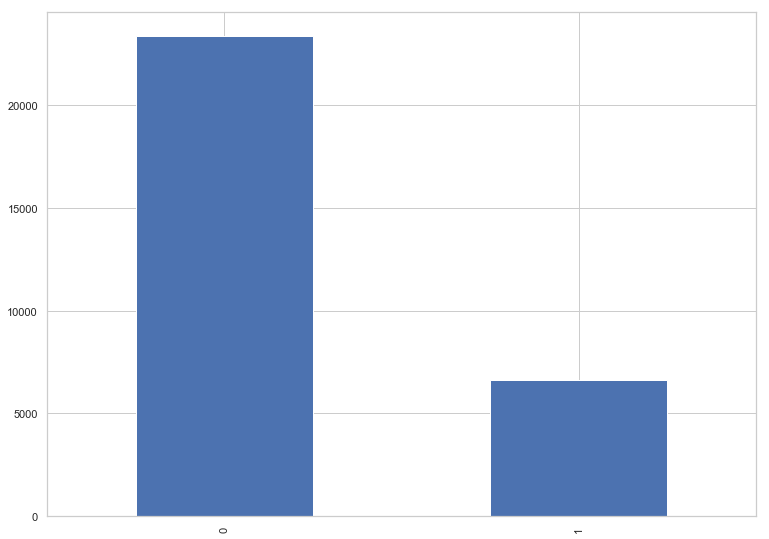

In [16]:

# defaulting next payment is rare, but not exceedingly so
df["defaulted"].value_counts().plot.bar()
plt.show()
